
# **Resources**

SentenceTransformers Documentation: https://www.sbert.net/

Pretrained Models for SentenceTransformers:https://www.sbert.net/docs/pretrained_models.html

Corpus and Algorithm idea from: https://stackoverflow.com/questions/55619176/how-to-cluster-similar-sentences-using-bert

# **Sentence Transformers installation**
The "sentence-transformers" library is a Python package that provides pre-trained models for converting sentences or texts into dense vector representations. These vector representations, also known as embeddings, capture the semantic meaning of the input text.

In [ ]:
!pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 57.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 86.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.5 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=4abcc975ddf88dd867c60eea6477c92f99ae69648d4e441d9dc76ac83da5a981
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


# **Tweet-preprocessor installation**
 The "tweet-preprocessor" package is a useful tool when working with tweet data, allowing you to preprocess and clean tweet text for a variety of applications, including text analysis, machine learning, data mining, and social media analytics.

In [ ]:
!pip install tweet-preprocessor

# **Loading the packages**

In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer
import re
import preprocessor as p
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# **SentenceTransformer instance Initialization**
 Initialization of an instance of the SentenceTransformer class from the "sentence-transformers" package, specifically using the 'all-MiniLM-L6-v2' model as the underlying embedding model.

In [ ]:
embedder = SentenceTransformer('all-MiniLM-L6-v2')

# **Read the Data**

In [ ]:
df = pd.read_csv('topical_chat.csv')
df=df.head(70000)
df.head()

,conversation_id,message,sentiment
0,1,Are you a fan of Google or Microsoft?,Curious to dive deeper
1,1,Both are excellent technology they are helpfu...,Curious to dive deeper
2,1,"I'm not a huge fan of Google, but I use it a...",Curious to dive deeper
3,1,Google provides online related services and p...,Curious to dive deeper
4,1,"Yeah, their services are good. I'm just not a...",Curious to dive deeper


# **Extract the sentiment possible values**
We extract the possible sentiment values to determine the number of clusters since each sentiment corresponds to a cluster.

In [ ]:
unique_values = df['sentiment'].unique()
print(unique_values)

[' Curious to dive deeper' ' Happy' ' Neutral' ' Surprised' ' Disgusted'
 ' Sad' ' Fearful' ' Angry']


# **Transform sentiment labels to clusters numbers**

In [ ]:
l=[]
for i in df['sentiment']:
  if i==' Curious to dive deeper':
     l.append(0)
  elif i==' Happy':
     l.append(1)
  elif i==' Neutral':
     l.append(2)
  elif i==' Surprised':
     l.append(3)
  elif i==' Disgusted':
     l.append(4)
  elif i==' Sad':
     l.append(5)
  elif i==' Fearful':
     l.append(6)
  elif i==' Angry':
     l.append(7)


# **Add cluster column in the Data Frame**

In [ ]:
df['cluster']=l

#**Shuffle the Data**

In [ ]:
import pandas as pd

# Assuming df is your DataFrame
shuffled_df = df.sample(frac=1).reset_index(drop=True)

# **Cleaning the Data Frame**
**Preprocessor** library provides functionality to clean and preprocess tweets, possibly by removing URLs, usernames, hashtags, and other unwanted elements from the tweet text.

In [ ]:
def clean_tweets(df):
    # punctuations we want to be replaced
    REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\|)|(\()|(\))|(\[)|(\])|(\%)|(\$)|(\>)|(\<)|(\{)|(\})")
    REPLACE_WITH_SPACE = re.compile("(<br\s/><br\s/?)|(-)|(/)|(:).")
    corpus = []
    for line in df:
        # clean data by sending it to tweet_processor
        sentence = p.clean(line)
        # remove puctuation
        sentence = REPLACE_NO_SPACE.sub("", sentence.lower()) # convert all tweets to lower cases
        sentence = REPLACE_WITH_SPACE.sub(" ", sentence)
        corpus.append(sentence)
    return corpus

We call the "clean_tweets" function and we add the values as a new column in the data frame to visualize the difference before and after cleaning.

In [ ]:
df['message_clean'] = clean_tweets(df['message'])
df.shape

(70000, 5)

# **Take 5000 from each cluster(to facilitate the process)**

In [ ]:
df_sample = df.groupby('cluster').head(5000)

# **Corpus list to manipulate**
We extract the values of 'message_clean' column in a list.

In [ ]:
corpus = list(df_sample['message_clean'])

# **True Values Extraction**
The extraction of true values(clusters numbers) in a list to use it later.

In [ ]:
trueValues=df_sample['cluster']

#**Clustering**
The code demonstrates how to use the embedder object (created from the SentenceTransformer class) to encode a corpus of sentences or texts into their corresponding embeddings.

Each element in corpus_embeddings will correspond to the embedding representation of the corresponding sentence or text in the corpus. These embeddings capture the semantic meaning of the text and can be used for various downstream tasks such as similarity comparison, clustering, or as input to machine learning models.

NB: The dimensions and shape of the resulting corpus_embeddings may depend on the specific model used and the length of the input corpus.

In [ ]:
import numpy as np
corpus_embeddings = embedder.encode(corpus)
corpus_embeddings=corpus_embeddings /  np.linalg.norm(corpus_embeddings, axis=1, keepdims=True)
corpus_embeddings

array([[-0.08698272, -0.06402155,  0.02879572, ..., -0.0003257 ,
         0.02569159,  0.0019837 ],
       [-0.09157781,  0.01107083, -0.07460242, ..., -0.00602576,
         0.03453691,  0.02982436],
       [-0.12794346, -0.13206671, -0.00324433, ...,  0.05626319,
         0.032348  ,  0.05572385],
       ...,
       [-0.02623932,  0.09135664,  0.04095055, ..., -0.10166096,
         0.02067422, -0.07181778],
       [ 0.03156837,  0.02997585,  0.06574172, ..., -0.1120254 ,
         0.03870127, -0.02948402],
       [ 0.00046427,  0.00128642, -0.02843694, ..., -0.1100176 ,
        -0.08075593, -0.02924229]], dtype=float32)

# **Agglomerative Algorithm Explication**
Steps to agglomerative hierarchical clustering :
1. Preparing the data
2. Computing (dis)similarity information between every pair of objects in the data set.
3. Using the linkage function to group objects into a hierarchical cluster tree, based on the distance information generated in step 1. Objects/clusters that are in close proximity are linked together using the linkage function.
4. Determining where to cut the hierarchical tree into clusters. This creates a partition of the data.

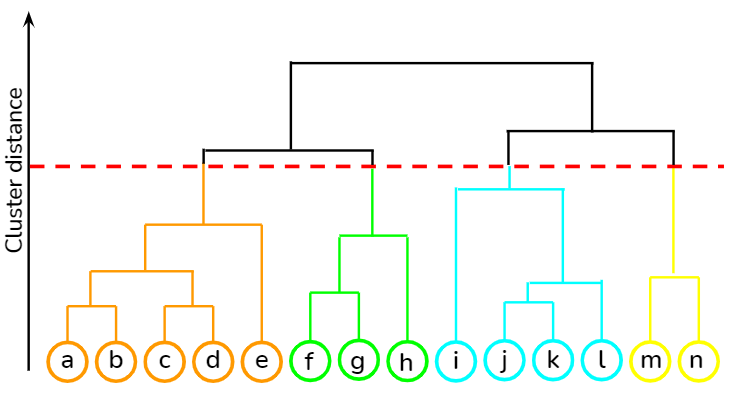

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
# Perform Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering
clustering_model = AgglomerativeClustering(n_clusters=8, distance_threshold=None)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_


In [ ]:
cluster_assignment = clustering_model.labels_

In [ ]:
cluster_assignment

array([1, 0, 1, ..., 0, 0, 1])

In [ ]:
cluster_df = pd.DataFrame(corpus, columns = ['corpus'])
cluster_df['cluster'] = cluster_assignment
cluster_df.head()

,corpus,cluster
0,are you a fan of google or microsoft,1
1,both are excellent technology they are helpful...,0
2,im not a huge fan of google but i use it a lot...,1
3,google provides online related services and pr...,1
4,yeah their services are good im just not a fan...,0


In [ ]:
import numpy as np

def tri_et_index(tableau):
    # Obtenir les indices des valeurs triées en ordre décroissant
    indices_tries = np.flip(np.argsort(tableau))

    return indices_tries

In [ ]:
import numpy as np

def map_labels(predicted_labels, true_labels):
    unique_predicted_labels = np.unique(predicted_labels)
    label_mapping = {index: 10 for index in unique_predicted_labels}

    for predicted_label in unique_predicted_labels:
        i=0
        mask = predicted_labels == predicted_label
        cluster_true_labels = true_labels[mask]
        true_label_counts = np.bincount(cluster_true_labels)
        indexs=tri_et_index(true_label_counts)
        most_frequent_true_label=indexs[i]
        l=[label_mapping[label] for label in unique_predicted_labels]

        while most_frequent_true_label in l[:predicted_label]:
            most_frequent_true_label = indexs[i+1]
            i+=1
        label_mapping[predicted_label] = most_frequent_true_label

    return label_mapping

label_mapping = map_labels(cluster_assignment, trueValues)

In [ ]:
mapped_predicted_labels = np.array([label_mapping[label] for label in cluster_assignment])
unique_values = np.unique(mapped_predicted_labels)
label_mapping

{0: 0, 1: 3, 2: 1, 3: 2, 4: 5, 5: 4, 6: 6, 7: 7}

In [ ]:
def get_accuracy(predictions, Y):
    #print(predictions, Y)
    return np.sum(predictions == Y) / len(Y)

In [ ]:
a=get_accuracy(cluster_assignment,trueValues)
a

0.15284178187403993